# Data Drift Test Notebook for Tabular Data

This notebook implements a series of tests and measures to determine drift between a baseline and production dataset.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot, 
                    categorical_grouped_bar_plot, 
                    jensen_shannon_distance_numerical, 
                    jensen_shannon_distance_categorical, 
                    normed_wasserstein_distance_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

### Numerical Data

In [2]:
observations = 100_000
observations_reduction_factor_for_y = 10
bin_strategy = 'stu' #choose between 'stu', 'evi', 'min', and 'max'

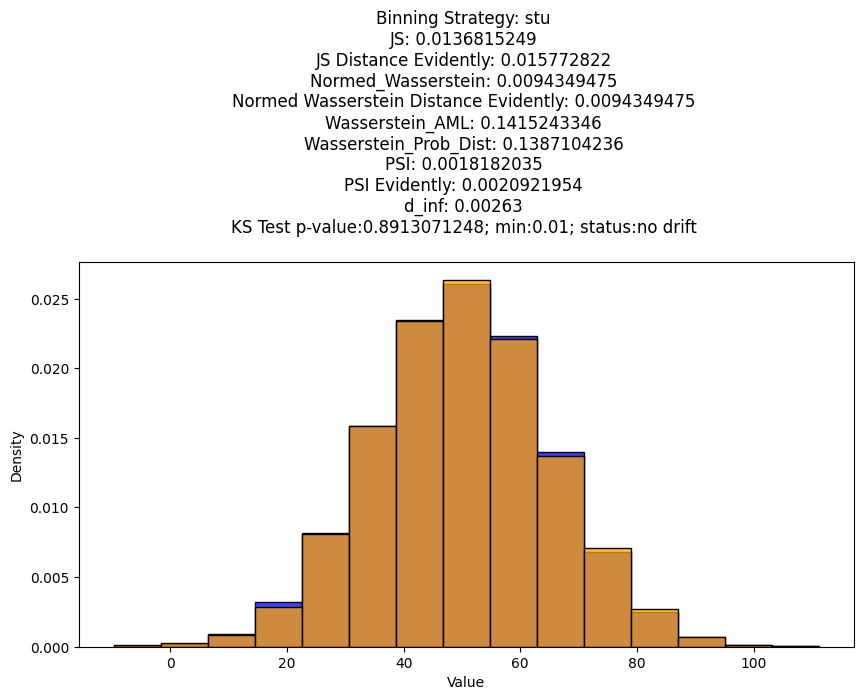

In [3]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(50, 15, int(observations/observations_reduction_factor_for_y)) # identical with x
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

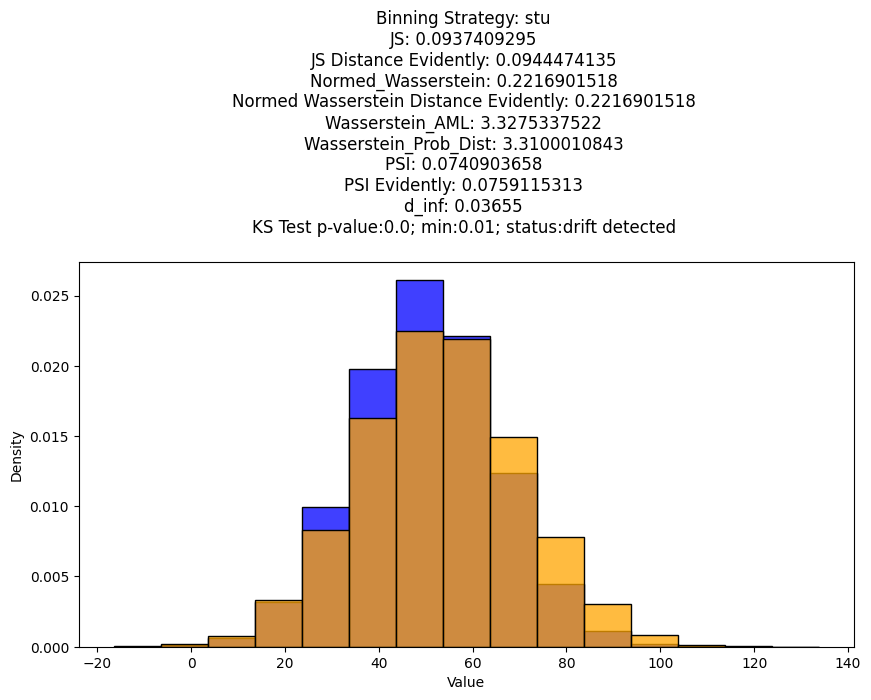

In [4]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(53, 17, int(observations/observations_reduction_factor_for_y)) # Minor drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

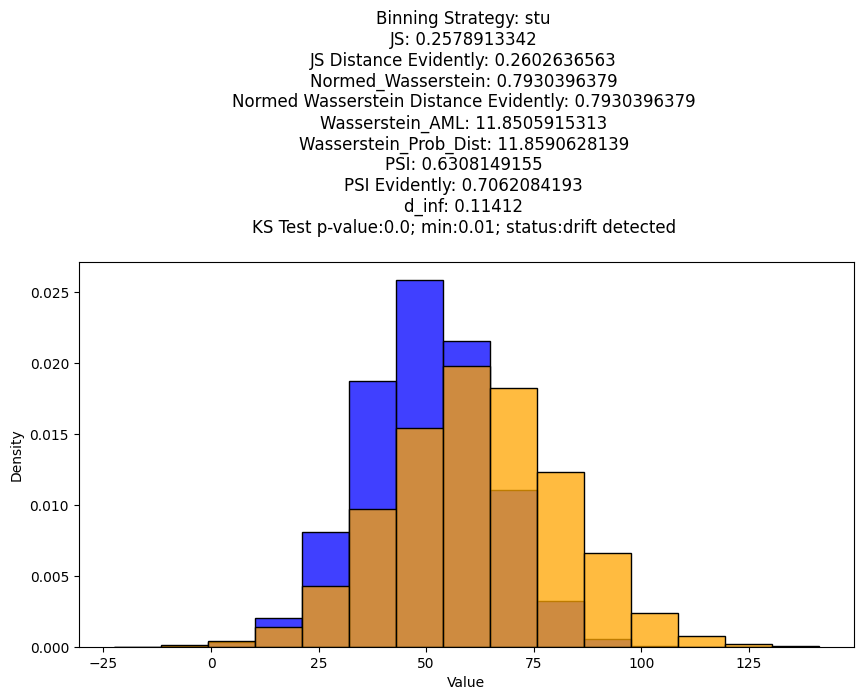

In [5]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(62, 20, int(observations/observations_reduction_factor_for_y)) # major drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

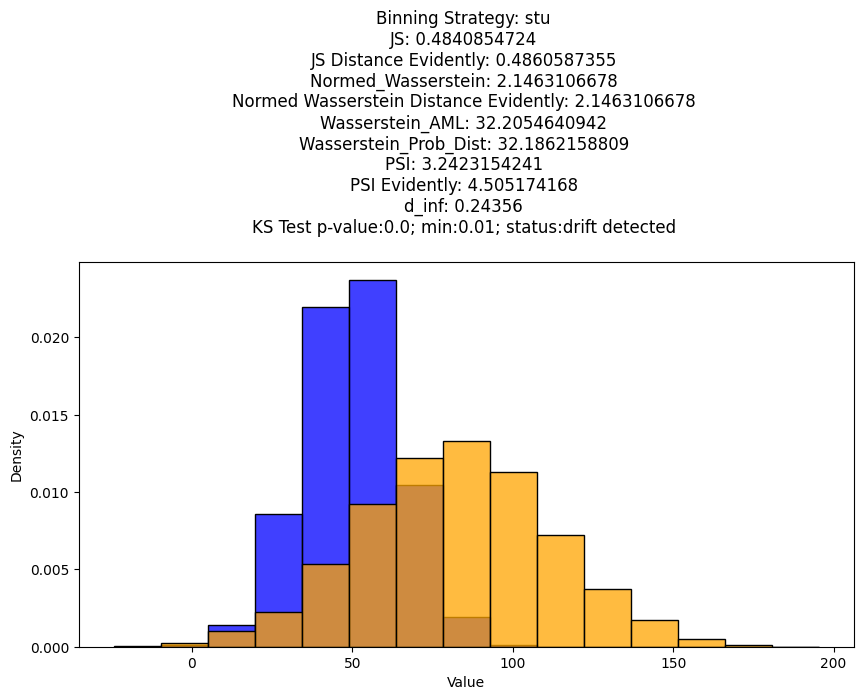

In [6]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(82, 30, int(observations/observations_reduction_factor_for_y)) # major drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

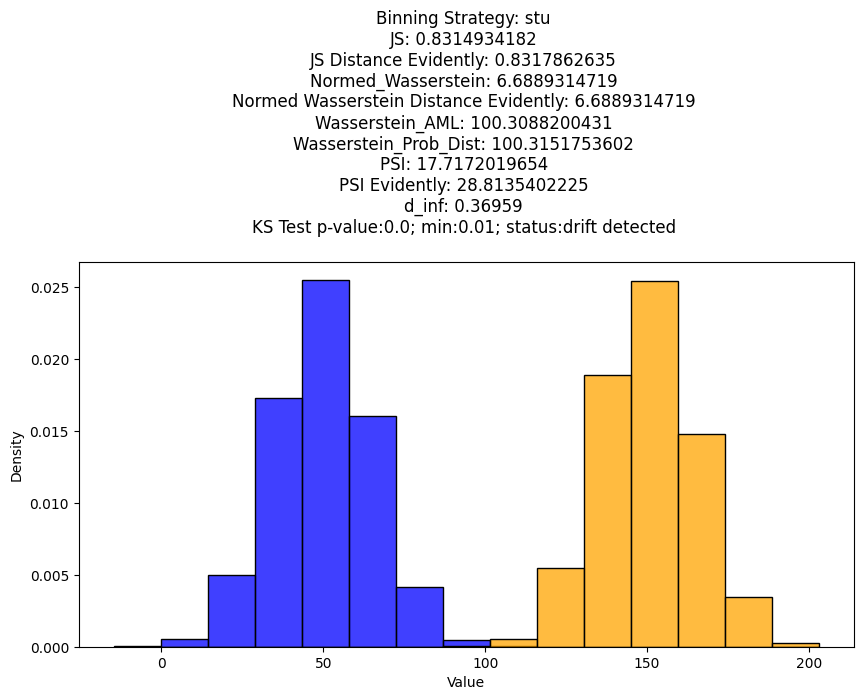

In [7]:
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(150, 15, int(observations/observations_reduction_factor_for_y)) # extreme drift
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

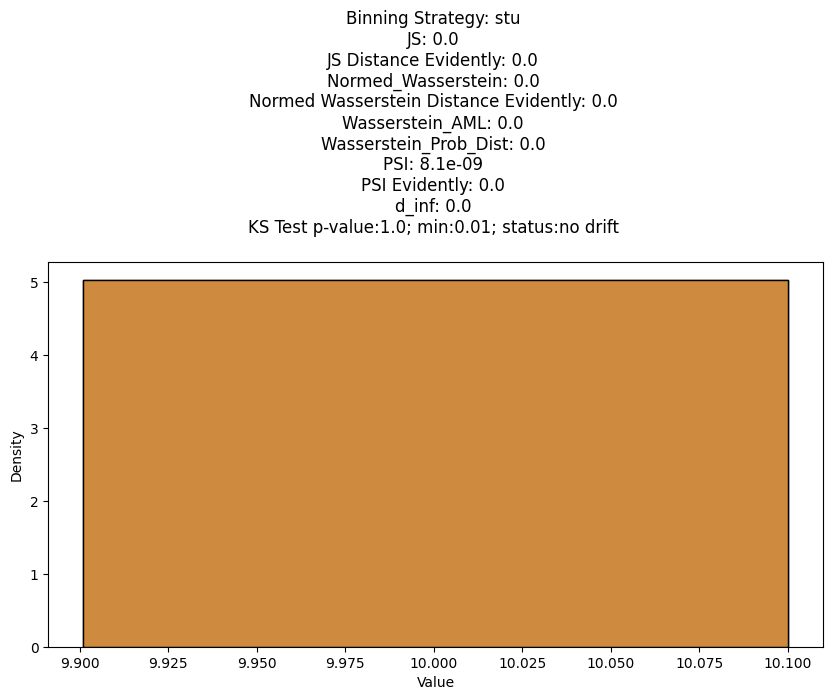

In [8]:
x = np.full(observations,10) # single value
y = np.full(int(observations/observations_reduction_factor_for_y),10) # same single value
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

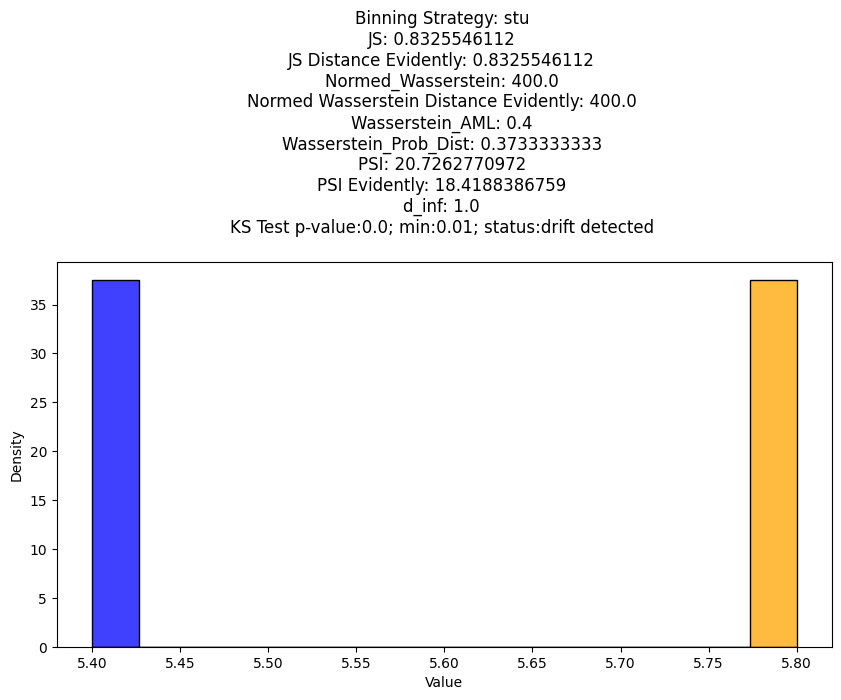

In [9]:
x = np.full(observations,5.4) # single value
y = np.full(int(observations/observations_reduction_factor_for_y),5.8) #different single val
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

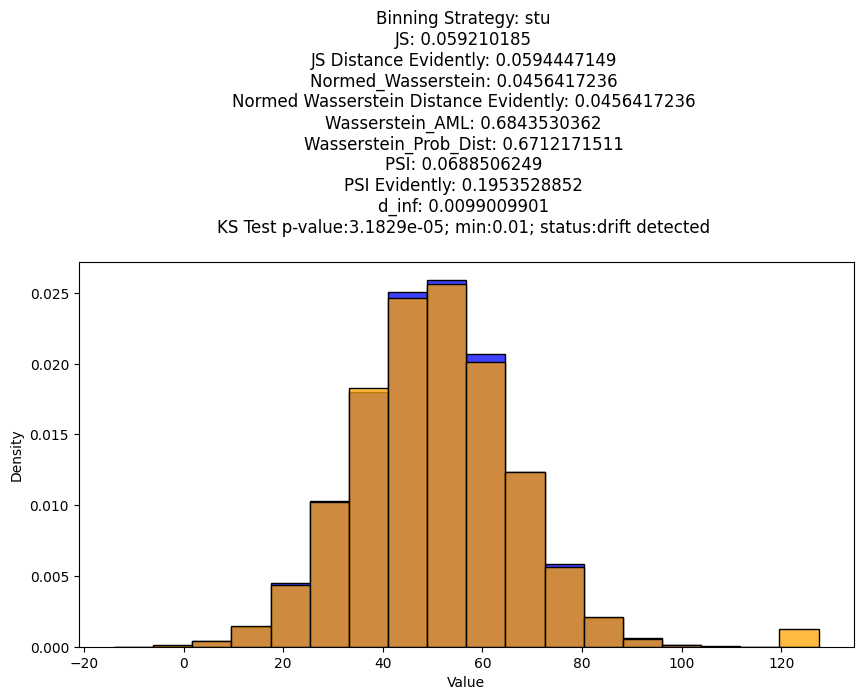

In [10]:
x = np.random.normal(50, 15, observations) # reference
y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/100))) # same as reference with small amout of outliers
g = numerical_data_distribution_plot(x, y, bin_strategy=bin_strategy)

### Categorical Data

In [11]:
# Sample strings to generate categorical variables: a and b differ slightly. Strong difference between a versus c
a=('a'* 100 + 
   'b'* 100 + 
   'c'* 100 + 
   'd'* 100 + 
   'e'* 100 + 
   'f'* 100 + 
   'g'* 100 + 
   'h'* 100)

b=('a'* 97 + 
   'b'* 105 + 
   'c'* 99 + 
   'd'* 98 + 
   'e'* 101 + 
   'f'* 102 + 
   'g'* 97 + 
   'h'* 103)

c=('a'* 10 + 
   'b'* 11 + 
   'c'* 9 + 
   'd'* 10 + 
   'e'* 10 + 
   'f'* 10 + 
   'g'* 13 + 
   'h'* 10)

d=('a'* 180 + 
   'b'* 80 + 
   'c'* 70 + 
   'd'* 170 + 
   'e'* 200 + 
   'f'* 10 + 
   'g'* 130 + 
   'h'* 100)


e=('a'* 100 + 
   'b'* 100 + 
   'c'* 100 + 
   'd'* 100 + 
   'e'* 100 + 
   'f'* 100 + 
   'g'* 100 +
   'h'* 1  
)

# convert to lists
a_list = [letter for letter in a]
b_list = [letter for letter in b]
c_list = [letter for letter in c]
d_list = [letter for letter in d]
e_list = [letter for letter in e]

# shuffle lists
random.shuffle(a_list)
random.shuffle(b_list)
random.shuffle(c_list)
random.shuffle(d_list)
random.shuffle(e_list)

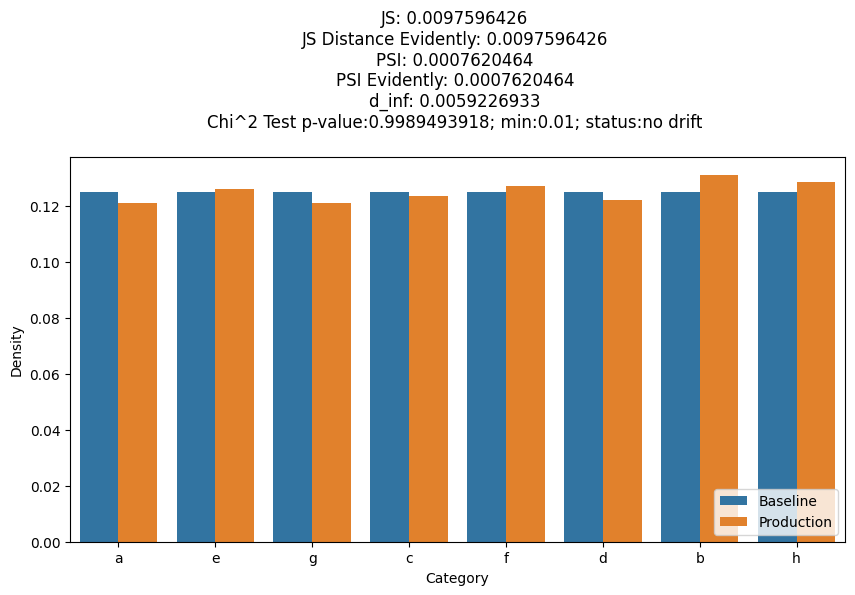

In [12]:
g = categorical_grouped_bar_plot(a_list, b_list)

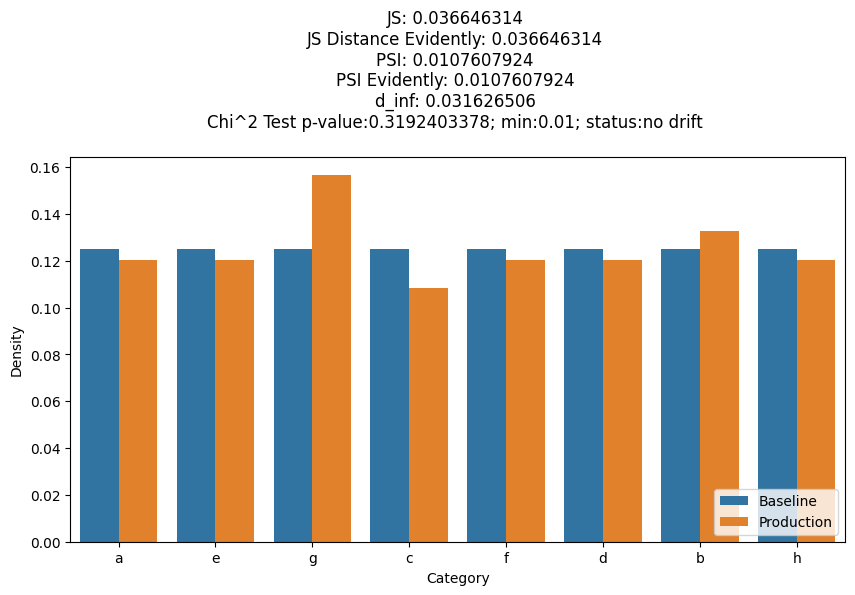

In [13]:
g = categorical_grouped_bar_plot(a_list, c_list)

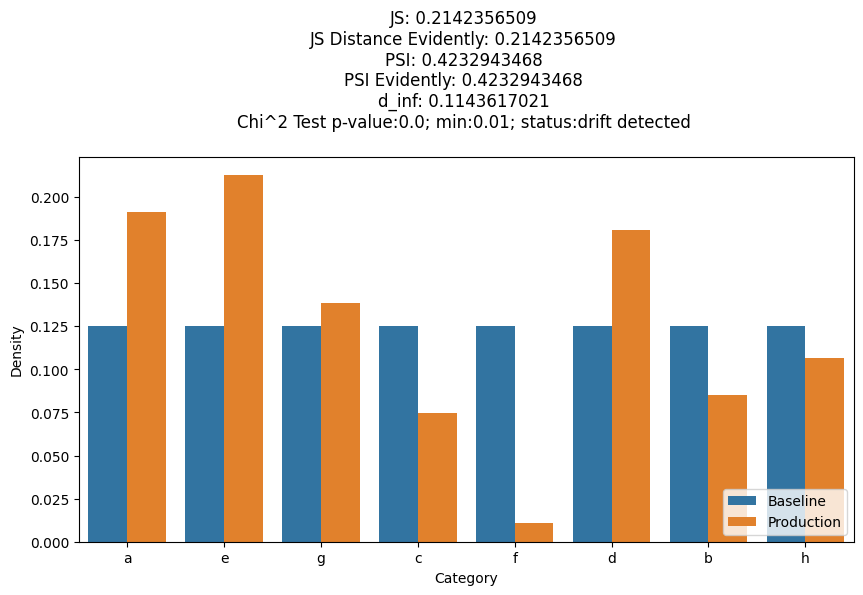

In [14]:
g = categorical_grouped_bar_plot(a_list, d_list)

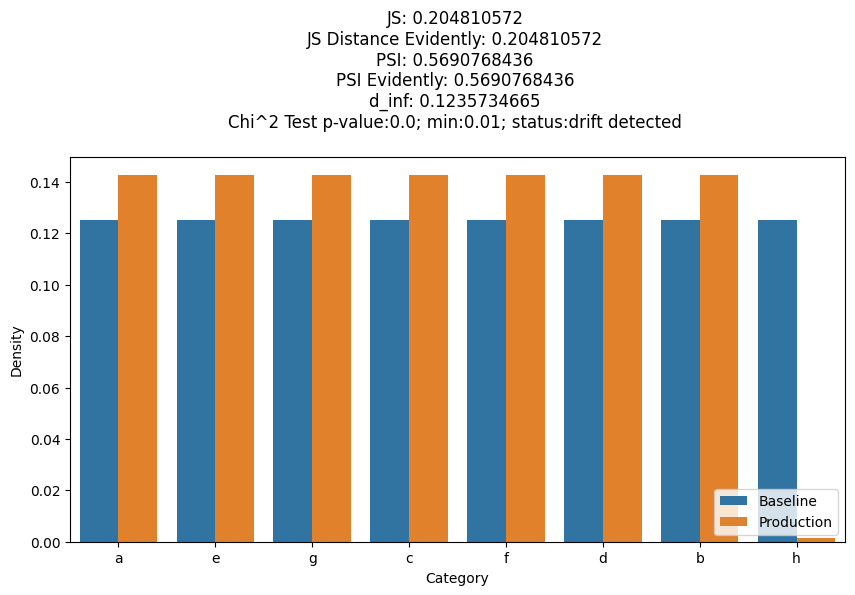

In [15]:
g = categorical_grouped_bar_plot(a_list, e_list)